<a href="https://colab.research.google.com/github/MariaDimopoulou/House-Prediction-Prices/blob/main/HousePredictionPrices.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LinearRegression
import pandas as pd
from sklearn.model_selection import train_test_split
import random
from matplotlib import pyplot as plt
np.random.seed(5)

Using the columns x1 containing the area of each house and x2 containing the number of bedrooms in order to create a regression model of the form
𝑦̂=𝛽1𝑥1+𝛽2𝑥2+𝑐


In [3]:
data=pd.DataFrame(pd.read_excel('housedata1.xlsx'))
x1=data.iloc[:,[3,1]]
y=data.iloc[:,[5]]
x=np.array(x1) #array with the data of area of each house and number of bedrooms
y=np.array(y) #array with the data of the house prices
x_train_model1,x_test_model1,y_train_model1,y_test_model1=train_test_split(x,y,test_size=79) #choosing random train and test setfor our model
basic_model=LinearRegression().fit(x,y) #creating the regression model through all our data
print(f"c_basic= {basic_model.intercept_}")
print(f"β1_basic,β2_basic= {basic_model.coef_}")
#1st way using Linear Regression through Python's function for our train test
model = LinearRegression().fit(x_train_model1, y_train_model1) #our regression model using only the train set
print(f"c= {model.intercept_}")
print(f"β1,β2= {model.coef_}")
#2nd way with least squares method for our train set
θ= np.linalg.lstsq(np.c_[np.ones(695),x_train_model1], y_train_model1, rcond=None)[0]
print("θ_1= ", θ)


c_basic= [54401.67360394]
β1_basic,β2_basic= [[   148.7250726  -18853.35787778]]
c= [58944.87541182]
β1,β2= [[   148.37585407 -19732.3905185 ]]
θ_1=  [[ 58944.87541182]
 [   148.37585407]
 [-19732.3905185 ]]


Creating a scatter plot of actual and predicted sale price for all 774 houses.

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but LinearRegression was fitted without feature names
  warnings.warn(


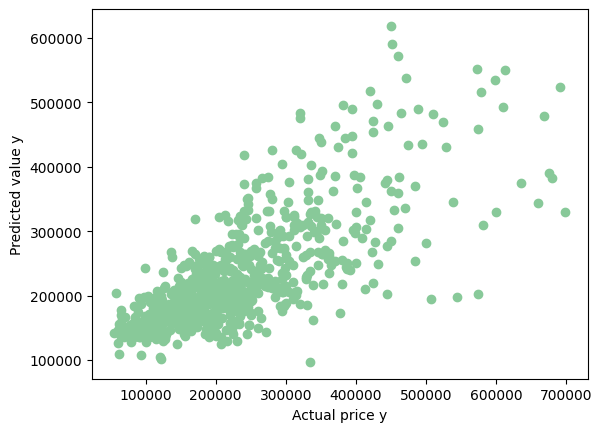

In [4]:
y_predictions=np.array(basic_model.predict(data.iloc[:,[3,1]])) #we are using our basic model to see the scatter plot
y_actual=np.array(data.iloc[:,[5]])
plt.scatter(y_actual,y_predictions,color='#88c999')
plt.xlabel('Actual price y')
plt.ylabel('Predicted value y')
plt.show()

Using 5 houses to test the efficiency of the above method

In [5]:
y_pred_basic_model = basic_model.predict([[846,1],[1324,2],[1150,3],[3037,4],[3984,5]])
y_pred=model.predict([[846,1],[1324,2],[1150,3],[3037,4],[3984,5]])
print("The predicted values for the abovementioned houses using all our data are: ",y_pred_basic_model)
print("The predicted values for the abovementioned houses using our train set are: ",y_pred)


The predicted values for the abovementioned houses using all our data are:  [[161369.72714601]
 [213606.95397117]
 [168875.43346094]
 [430666.28757991]
 [552655.57345461]]
The predicted values for the abovementioned houses using our train set are:  [[164738.45743375]
 [215929.72515913]
 [170379.93603303]
 [430632.7821384 ]
 [551412.32542106]]


Finding the Root-Mean-Square Error (RMSE) for the training and test data. If they are close enough we have increased confidence that our model has reasonable generalization ability

In [6]:
MSE_train=np.square(np.subtract(model.predict(x_train_model1),y_train_model1)).mean()
RMSE_train=np.sqrt(MSE_train)
print("RMSE(training set)= ", RMSE_train)
MSE_test=np.square(np.subtract(model.predict(x_test_model1),y_test_model1)).mean()
RMSE_test=np.sqrt(MSE_test)
print("RMSE(test set)= ", RMSE_test)

RMSE(training set)=  75854.93478053261
RMSE(test set)=  65455.62640883055


We develop a more complicated regression model for the house sales data.For this more complex model we will use four base attributes or original features:
• x1 is the area of the house (in 1000 square feet), • x2 is the number of bedrooms, • x3 is equal to one if the property is a condominium, and zero otherwise,
• x4 is the five-digit ZIP code.
Here we examine a more complicated model, with 8 basis.

In [7]:
x_1=np.array(data.iloc[:,[3]])
x_2=np.array(data.iloc[:,[1]])
x_3=np.array(data.iloc[:,[4]])
x_4=np.array(data.iloc[:,[0]])
fx_3=np.piecewise(x_1,[x_1>1500,x_1<=1500],[lambda x_1: x_1-1500,lambda x_1:0])
fx_6=np.zeros(len(x_4))
fx_7=np.zeros(len(x_4))
fx_8=np.zeros(len(x_4))
for count,value in enumerate(x_4): #In region 1 we want: fx_6=fx_7=fx_8=0| In region 2: fx_6=1 and fx7=fx_8=0|In region 3: fx_7=1 and fx_6=fx_8=0|In region 4: fx_8=1 and fx_6=fx_7=0
    if value==2:
        fx_6[count]=1
    elif value==3:
        fx_7[count]=1
    elif value==4:
        fx_8[count]=1
    continue
x=np.c_[x_1,fx_3,x_2,x_3,fx_6,fx_7,fx_8]
y=data.iloc[:,[5]]
x_train_model2,x_test_model2,y_train_model2,y_test_model2=train_test_split(x,y,test_size=79)
basic_model_2 = LinearRegression().fit(x, y) #our regression model using all of our data
print(f"θ1= {basic_model_2.intercept_}")
print(f"θ2,θ3,θ4,θ5,θ6,θ7,θ8= {basic_model_2.coef_}")
θ_2= np.linalg.lstsq(np.c_[np.ones(695),x_train_model2], y_train_model2, rcond=None)[0] #We are finding the model parameters using our train set
print("θ_2= ", θ_2)



θ1= [115616.82367026]
θ2,θ3,θ4,θ5,θ6,θ7,θ8= [[ 1.75413141e+02 -4.27477680e+01 -1.78783552e+04 -1.90447257e+04
  -1.00910503e+05 -1.08791122e+05 -2.47652473e+04]]
θ_2=  [[ 1.20852754e+05]
 [ 1.62544846e+02]
 [-2.72730025e+01]
 [-1.47268077e+04]
 [-2.01844366e+04]
 [-1.00160285e+05]
 [-1.09311654e+05]
 [-2.44544647e+04]]


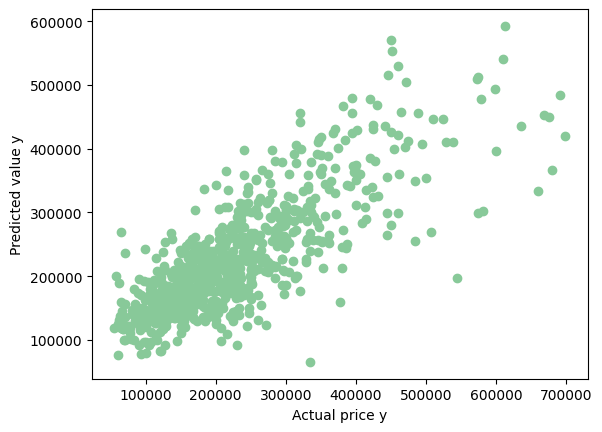

In [8]:
y_actual_2=np.array(data.iloc[:,[5]])
y_predictions_2=np.array(basic_model_2.predict(x)) #we create a scatter plot to see the new model with all of our data
plt.scatter(y_actual_2,y_predictions_2,color='#88c999') #we could also create a scatter plot with our model from training set to check the prediction
plt.xlabel('Actual price y') #this could happen by using  y_predictions_2=np.array(model_2.predict(x))
plt.ylabel('Predicted value y')
plt.show()


Using the cross validation technique for the above 2 models to testify the confidence in the generalization of the model.

FOLD 1 :
constant= [54036.10276743]
rest= [[   150.1769469  -18404.83595003]]
RMSE(training set_)=  76352.46150258619
RMSE(test set_)=  68918.18460478097


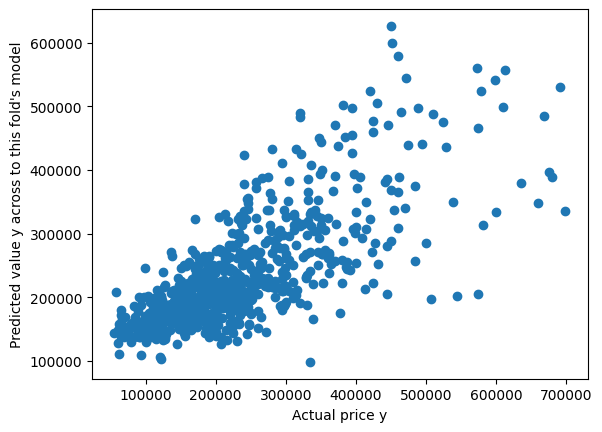

FOLD 2 :
constant= [63767.5087255]
rest= [[   148.90666428 -22065.79887314]]
RMSE(training set_)=  73466.20334151828
RMSE(test set_)=  80381.33985557094


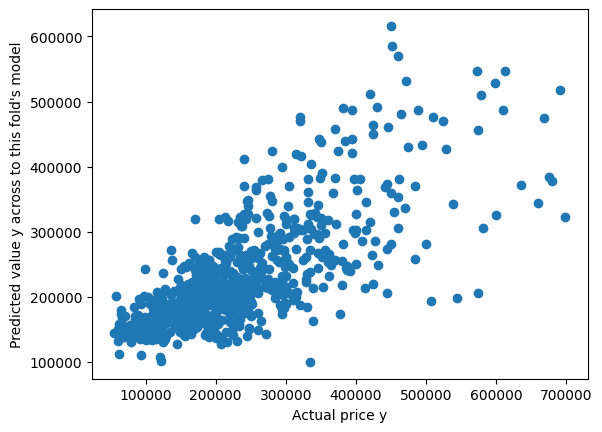

FOLD 3 :
constant= [48123.48703265]
rest= [[   151.29557551 -19392.16928682]]
RMSE(training set_)=  71034.56359105938
RMSE(test set_)=  89039.77763077643


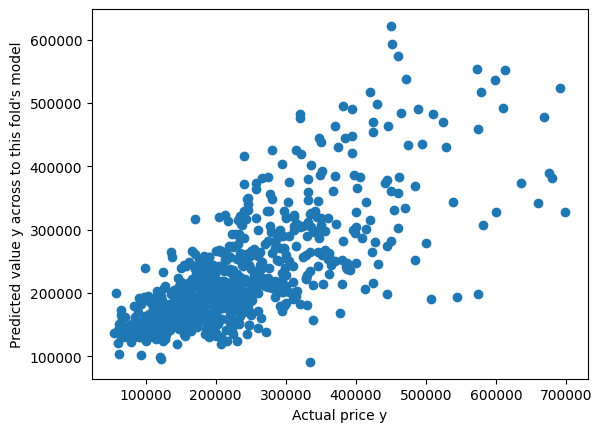

FOLD 4 :
constant= [53708.26677892]
rest= [[   150.92664767 -18606.18551103]]
RMSE(training set_)=  79192.98965554897
RMSE(test set_)=  54615.612746613784


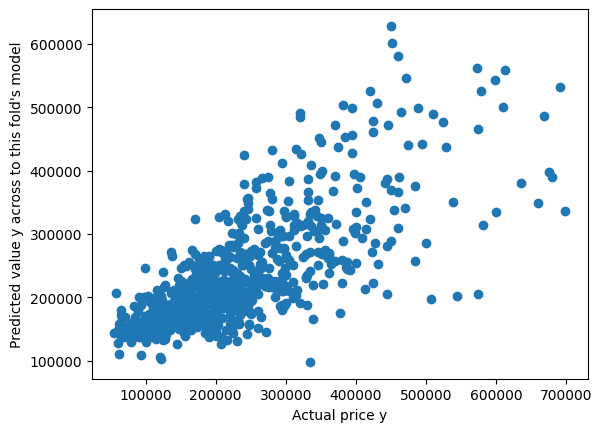

FOLD 5:
constant= [53103.13521475]
rest= [[   141.34392792 -15518.62306568]]
RMSE(training set_5)=  73440.12500344671
RMSE(test set_5)=  80580.24104913847


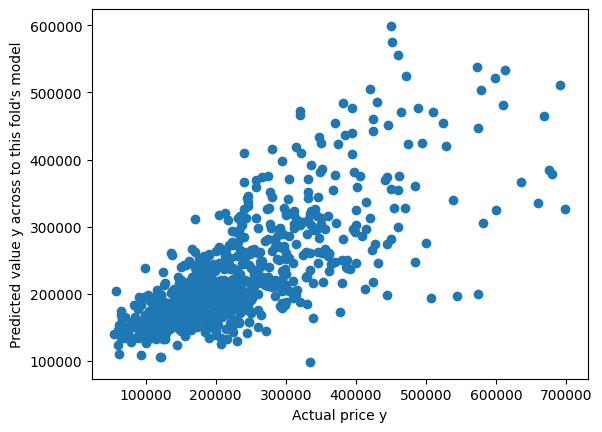

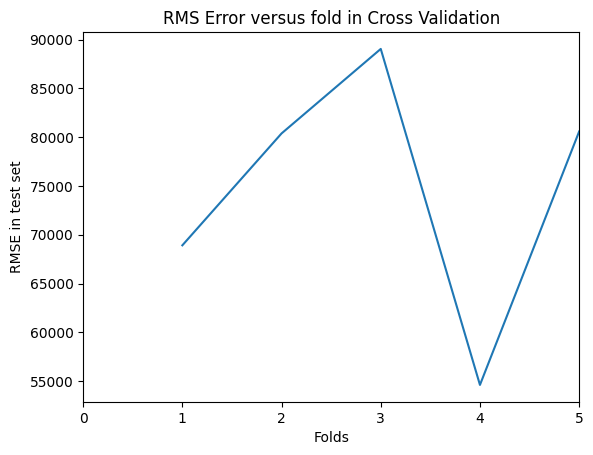

RMS cross validation error= 75650.51007092936
FOLD 1 :
constant= [119722.8030186]
rest= [[ 1.69544098e+02 -3.59127104e+01 -1.50143744e+04 -1.83061801e+04
  -1.04397170e+05 -1.15265979e+05 -2.90791356e+04]]
RMSE(training set_)=  69189.0651929371
RMSE(test set_)=  65126.98936745864


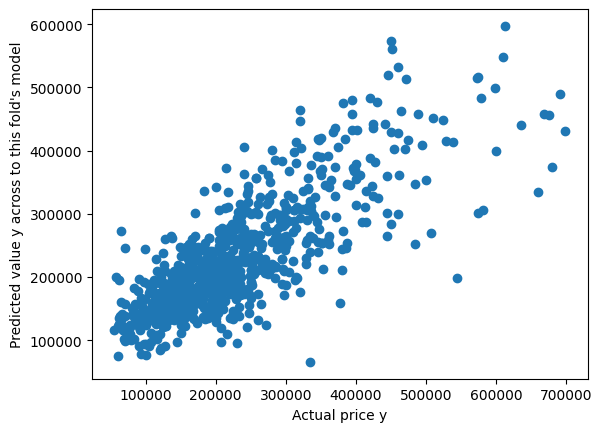

FOLD 2 :
constant= [106278.23617741]
rest= [[ 1.75311466e+02 -4.35535274e+01 -2.09256459e+04 -1.74113045e+04
  -8.39468070e+04 -8.78228767e+04 -4.93164137e+03]]
RMSE(training set_)=  67730.2785271978
RMSE(test set_)=  71542.80417397483


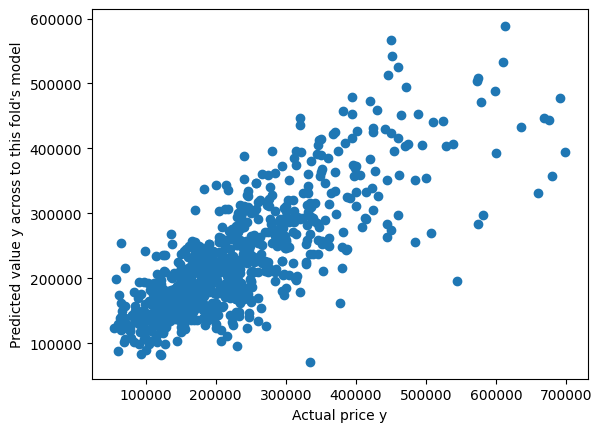

FOLD 3 :
constant= [120831.87155908]
rest= [[ 1.80078380e+02 -4.43461015e+01 -2.03048945e+04 -2.46691831e+04
  -1.05795441e+05 -1.16956968e+05 -4.21481291e+04]]
RMSE(training set_)=  64850.49856551797
RMSE(test set_)=  81721.2502414593


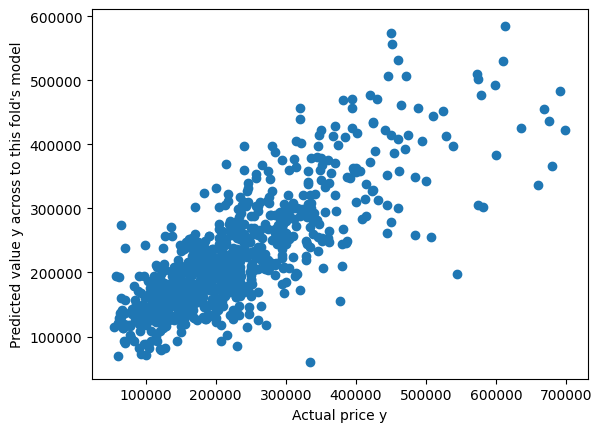

FOLD 4 :
constant= [119641.83063771]
rest= [[ 1.86802683e+02 -5.31373308e+01 -1.99663569e+04 -2.21020997e+04
  -1.10213810e+05 -1.17739831e+05 -3.06843679e+04]]
RMSE(training set_)=  71722.96520765164
RMSE(test set_)=  53709.20619031534


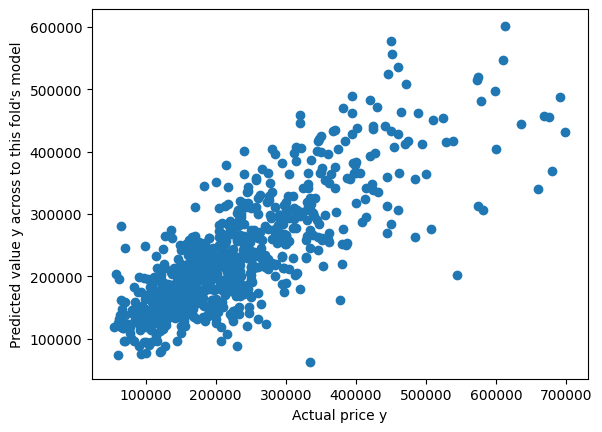

FOLD 5:
constant= [110545.25606381]
rest= [[ 1.64629570e+02 -3.62069133e+01 -1.32757016e+04 -1.40402070e+04
  -9.76811003e+04 -1.03473178e+05 -1.53943998e+04]]
RMSE(training set_5)=  67378.00093859664
RMSE(test set_5)=  72374.67349605885


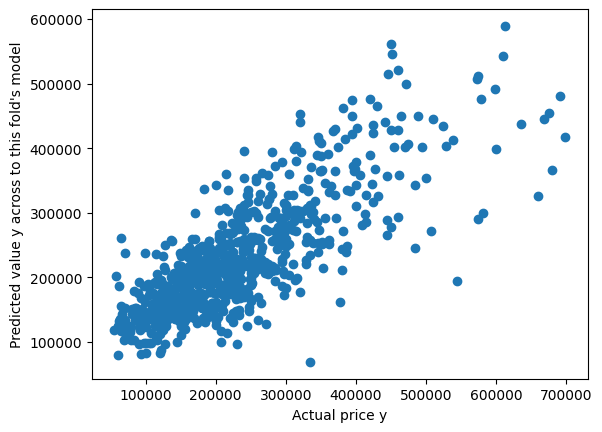

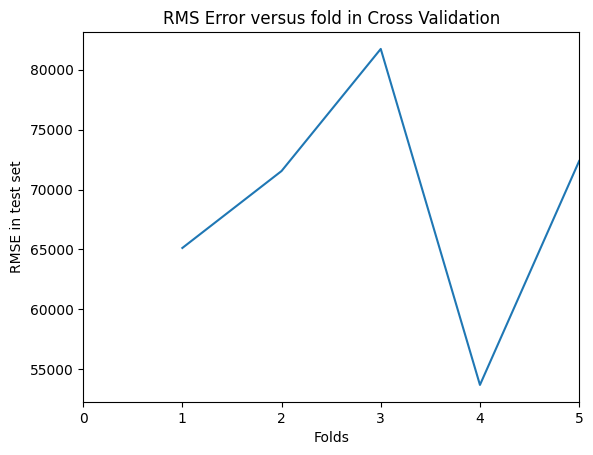

RMS cross validation error= 69514.0741252114


In [11]:
X=np.array(data[['house area in 1000 square feet','#bedrooms']])
y=np.array(data[['selling price in 1000 dollars']])
x=np.c_[x_1,fx_3,x_2,x_3,fx_6,fx_7,fx_8]
def cross_vall(X,y): #Here we are creating a function that takes two arguments. The X is the data according to which we will create our model. The y argument is the target data.
    k=154 #We will take 154 data(rows) in each fold because: 774//5 =154. In the last fold we will take 158.
    RMS_each=0 #We will need this in order to count add the errors at the end and find the RMS error of the test sets in cross validation in total.
    fold=[i for i in range(1,6)] #We will need this list for the line graph at the end of the function.
    RMSE=[] #We will need this in order to add as elements the RMS errors of the test sets in each fold and make the line graph at the end.
    for folds in range(1,6):
        if folds!=5: #As i mentioned we will change the number of data that we will take in the last fold.
            test_X=X[k-154:k,:] #We are choosing as test set 154 rows in each fold. (The first 154 for the first fold, the next 154 for the second etc)
            test_y=y[k-154:k,:] #Same with our target data.
            train_X=np.r_[X[:k-154,:],X[k:,:]] #For train sets we are taking the remaining data(Meaning the ones before our test set and the ones after our test set)
            train_y=np.r_[y[:k-154,:],y[k:,:]]
            fold_model1=LinearRegression().fit(train_X, train_y) #our regression model using the fourth train set
            print("FOLD",folds,":")
            print(f"constant= {fold_model1.intercept_}")
            print(f"rest= {fold_model1.coef_}")
            MSE_train_=np.square(np.subtract(fold_model1.predict(train_X),train_y)).mean()
            RMSE_train_=np.sqrt(MSE_train_)
            print("RMSE(training set_)= ", RMSE_train_)
            MSE_test_=np.square(np.subtract(fold_model1.predict(test_X),test_y)).mean()
            RMSE_test_=np.sqrt(MSE_test_)
            print("RMSE(test set_)= ", RMSE_test_)
            RMS_each+=RMSE_test_**2 #We add the squares of each RMSE test in order to add them at the end of the function to find the total rmse for the cross validation
            k+=154 #Moving to the next 154 elements that we will use as test sets.

        else:
            test_5_X=X[616:,:] #Here we are taking the rest of the data that remained from the rest of the folds.
            test_5_y=y[616:,:]
            train_5_X=X[:616,:] #The only data left for train set are the ones before our test set.
            train_5_y=y[:616,:]
            fold_model1=LinearRegression().fit(train_5_X, train_5_y) #our regression model using the fifth train set
            print("FOLD 5:")
            print(f"constant= {fold_model1.intercept_}")
            print(f"rest= {fold_model1.coef_}")
            MSE_train_=np.square(np.subtract(fold_model1.predict(train_5_X),train_5_y)).mean()
            RMSE_train_=np.sqrt(MSE_train_)
            print("RMSE(training set_5)= ", RMSE_train_)
            MSE_test_=np.square(np.subtract(fold_model1.predict(test_5_X),test_5_y)).mean()
            RMSE_test_=np.sqrt(MSE_test_)
            print("RMSE(test set_5)= ", RMSE_test_)
            RMS_each+=RMSE_test_**2
        RMSE.append(RMSE_test_) #Adding in each fold the RMSE test.
        plt.scatter(y,fold_model1.predict(X)) #As in the previous questions in the project we are creating a scatter for each fold in order to check the predicted value using the specific model of the fold and comparing it with the actual price.
        plt.xlabel('Actual price y')
        plt.ylabel("Predicted value y across to this fold's model")
        plt.show()
    plt.plot(fold,RMSE) #This is the graph according to 13.11 image in vmls. It shows the rmse of the tests in during the different folds. The line is not very precise as the spots in each fold are discrete values. It just shows the tendancy of the rms error in each test set in the folds.
    plt.xlim(0,5)
    plt.xlabel('Folds')
    plt.ylabel('RMSE in test set')
    plt.title('RMS Error versus fold in Cross Validation')
    plt.show()
    RMS_total=np.sqrt(RMS_each/5) #Counting the total rms error of cross validation.
    print("RMS cross validation error=",RMS_total)

cross_vall(X,y) #calling the function for the basic regression model in the first question.
cross_vall(x,y) #callin the function for the more complicated model in the 5th question.
